<a href="https://colab.research.google.com/github/mekaneeky/GoMyCode-Intro2AI-notebooks/blob/main/GMC_AI_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [25]:
!gdown --id 1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc


Downloading...
From: https://drive.google.com/uc?id=1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc
To: /content/titanic-passengers.csv
100% 62.6k/62.6k [00:00<00:00, 47.6MB/s]


In [53]:
titanic_df = pd.read_csv("titanic-passengers.csv", delimiter=";")

In [58]:
titanic_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
854,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
298,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
323,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
431,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
401,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [55]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)

## Since we have 3 values at the same frequency for the most frequent in the cabin
# it is best to fill the 3 values equally. To affect the distribution less
most_frequent_cabin = ["G6", "C23 C25 C27", "B96 B98"]
third_of_passengers = len(titanic_df)//3

titanic_df["Cabin"][:third_of_passengers].fillna(most_frequent_cabin[0], inplace=True)
titanic_df["Cabin"][third_of_passengers:third_of_passengers*2].fillna(most_frequent_cabin[1], inplace=True)
titanic_df["Cabin"][third_of_passengers*2:].fillna(most_frequent_cabin[2], inplace=True)

titanic_df["Embarked"].fillna("S", inplace=True)

passenger_ids = titanic_df["PassengerId"]

titanic_df.drop(columns="Name", inplace=True)
titanic_df.drop(columns="Ticket", inplace=True)
titanic_df.drop(columns="Cabin", inplace=True)



In [60]:
###
# Numerization 
#

replacement_dict = {"Survived":{"Yes":1, "No":0},
                    "Sex":{"female":1,"male":0}}

try:
    titanic_df.replace(replacement_dict,inplace=True)
except TypeError:
    pass

try:
    one_hot_embarked = pd.get_dummies(titanic_df["Embarked"])
    titanic_df.drop(columns="Embarked", inplace=True)
    titanic_df = titanic_df.join(one_hot_embarked)
except KeyError:
    pass

try:
    one_hot_pclass = pd.get_dummies(titanic_df["Pclass"])
    titanic_df.drop(columns="Pclass", inplace=True)
    titanic_df = titanic_df.join(one_hot_pclass)
except KeyError:
    pass

scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(titanic_df) 
titanic_df.loc[:,:] = scaled_values

In [57]:
train_df, test_df = train_test_split(titanic_df,test_size=0.25,random_state=42)  #splitting data with test size of 25%

titanic_df.sort_values("PassengerId", inplace=True)
train_df.sort_values("PassengerId", inplace=True)
test_df.sort_values("PassengerId", inplace=True)

titanic_df.drop(columns="PassengerId", inplace=True)
train_df.drop(columns="PassengerId", inplace=True)
test_df.drop(columns="PassengerId", inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:


#features extraction
x_train = train_df.drop(columns="Survived").values
y_train = train_df['Survived'].values

x_test = test_df.drop(columns="Survived").values
y_test = test_df['Survived'].values


logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix_results = metrics.confusion_matrix(y_test, y_pred)

Accuracy=0.78


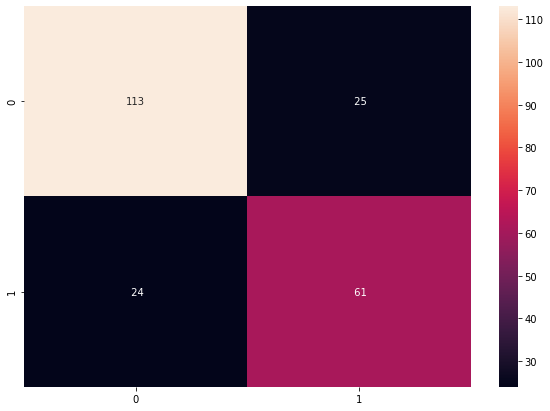

In [72]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix_results,fmt="3", annot=True)


# ROC/AUC Curves

The ROC/AUC curves are plotting the relationship between the false positive rates and the true positive rates as the threshold for positive hits is varied. The area under the curve represents the amount of true positives. It returns a value of 1.0 at perfect scores and falls to 0.0 as the false positives increase.

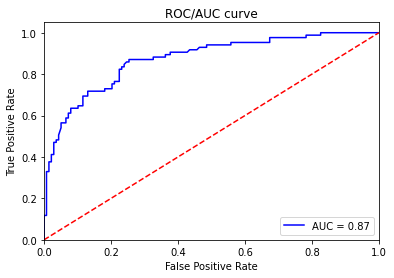

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,logreg.predict_proba(x_test)[:,1] )
auc = metrics.roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])

plt.title("ROC/AUC curve")
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc = 'lower right')
